# Load data from a remote server 

Extracts trials recorded with the imager and converted into mj2 files.

This can take a while depending on the proximity to data.

**Note:** These functions are deprecated in favor of the ``load_stack`` function.

In [ ]:
remotepath = '\\\\grid-hs.cshl.edu\\churchland_nlsas_data\\data\\BpodImager\\Animals\\CSP23\\SpatialDisc\\12-Mar-2020'
localdisk = 'd:\\temp_folder' # this should be an SSD or a fast drive

from wfield import parse_imager_mj2_folder
# WARNING: this can take some time (copying data) 
dat,frames_avg, trialonsets,trialinfo = parse_imager_mj2_folder(remotepath, localdisk)

# Explore the raw data

   Explore the raw data with napari
   
   Plot the average images

In [1]:
# Look at the data using napari (this does not load data into memory)
from wfield import *

localdisk = 'd:\\temp_folder'

dat_path = glob(pjoin(localdisk,'*.dat'))[0]
trial_onsets = np.load(pjoin(localdisk,'trial_onsets.npy'))

dat = mmap_dat(dat_path)

napari_show(dat)

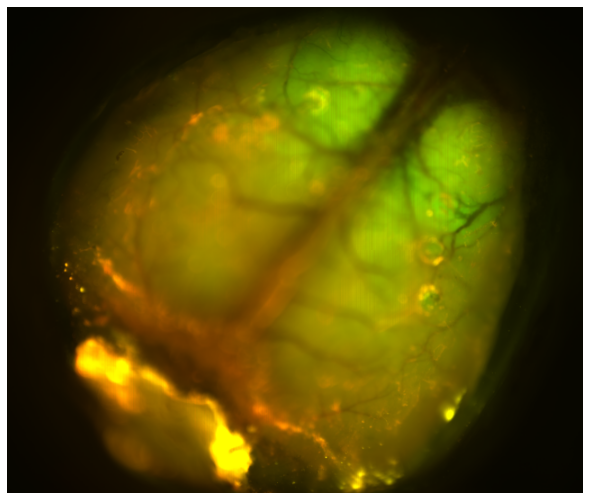

In [2]:
%matplotlib inline

frames_avg = np.load(pjoin(localdisk,'frames_average.npy'))

imshow_noborder(two_chan_to_rgb(frames_avg[::-1]), figsize=[8,8]);


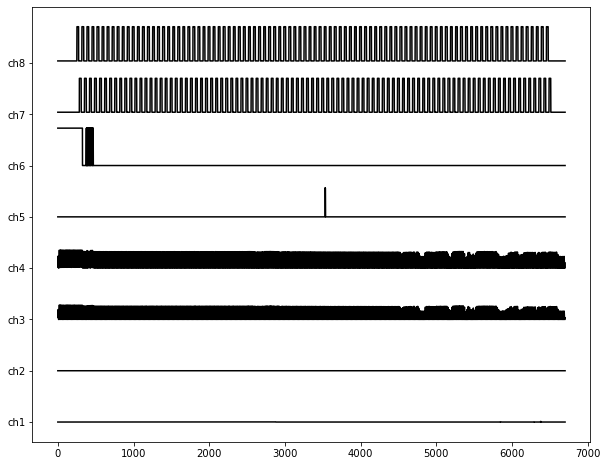

In [30]:
# Load and plot imager analog data
remotepath = '\\\\grid-hs.cshl.edu\\churchland_nlsas_data\\data\\BpodImager\\Animals\\CSP23\\SpatialDisc\\12-Mar-2020'
from wfield import *

dat,info = read_imager_analog(natsorted(glob(pjoin(remotepath,'Analog*.dat')))[400])

%matplotlib inline
plt.figure(figsize=[10,8])
plt.plot(dat[1:,:].T+np.arange(len(dat)-1)*5000,'k')
plt.yticks(np.arange(len(dat)-1)*5000,['ch{0}'.format(i+1) for i in np.arange(len(dat)-1)]);
